In [ ]:
###########################################################################
# I would like to acknowledge the authors of these task and images.
# Kaggle problem: https://www.kaggle.com/andrewmvd/face-mask-detection
# Source of the data: https://makeml.app/datasets/mask
###########################################################################

In [1]:
!pip install opencv-python


In [2]:
import os, sys
import pandas as pd
import numpy as np
import cv2

import matplotlib as mpl
import matplotlib.pyplot as plt

# 1. Import data

In [3]:
face_list = np.load(r'C:\Users\vigne\OneDrive\Desktop\adv_ds_project\face_list_pca.npy')
face_list.shape

(4072, 100, 100)

In [4]:
# Import combined_df from FeatureEngineering
combined_df = pd.read_csv(r"C:\Users\vigne\OneDrive\Desktop\adv_ds_project\combined_df_pca.csv",index_col=[0])
combined_df.head()

,Filename,ImgDim,Bndbox,ClassStr,label,0,1,2
0,C:/Users/vk/Desktop/adv_ds_project/annotations...,"[512, 366]","[79, 109, 105, 142]",without_mask,2,0.0,0.0,1.0
1,C:/Users/vk/Desktop/adv_ds_project/annotations...,"[512, 366]","[185, 226, 100, 144]",with_mask,1,0.0,1.0,0.0
2,C:/Users/vk/Desktop/adv_ds_project/annotations...,"[512, 366]","[325, 360, 90, 141]",without_mask,2,0.0,0.0,1.0
3,C:/Users/vk/Desktop/adv_ds_project/annotations...,"[400, 156]","[321, 354, 34, 69]",with_mask,1,0.0,1.0,0.0
4,C:/Users/vk/Desktop/adv_ds_project/annotations...,"[400, 156]","[224, 261, 38, 73]",with_mask,1,0.0,1.0,0.0


# 2. Train test split data

In [5]:
# Reshape image data from 3 dimensions to 2 dimensions
size=face_list.shape[1]
X = np.reshape(face_list, (face_list.shape[0],size*size))
Y = combined_df['label']

In [6]:
X.shape

(4072, 10000)

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_validate, y_train, y_validate = train_test_split(X, Y, test_size=0.2, random_state=3)

In [8]:
print('Training face_list and label sizes: \n{}, {}'.format(x_train.shape,y_train.shape))
print('Test face_list and label sizes: \n{}, {}'.format(x_validate.shape,y_validate.shape))

Training face_list and label sizes: 
(3257, 10000), (3257,)
Test face_list and label sizes: 
(815, 10000), (815,)


# 3. PCA model - reduce dim

In [9]:
from sklearn.decomposition import PCA
pca_model = PCA(n_components=20)
pca_data = pca_model.fit_transform(x_train)

In [10]:
pca_df = pd.DataFrame(data = pca_data)
pca_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-8.948840,-13.471689,-1.932150,-0.301474,0.198991,3.590844,-1.560852,3.431418,1.641612,-2.458547,5.860164,-1.036921,1.968686,2.731757,-2.047396,0.927100,-3.287677,-2.817235,0.219973,-0.892495
1,4.239660,-3.475217,3.742907,-10.954527,1.409797,-0.063777,1.807324,1.758984,-0.157787,-1.081871,-0.137020,-1.743727,-0.481335,-1.496705,1.186276,1.525503,0.030464,-0.600903,-0.383515,-1.473288
2,-8.076911,-3.854312,-8.973524,8.193727,1.583823,-4.181537,-1.815841,1.268326,-2.405956,2.897491,2.462270,-4.756045,1.079001,-2.136383,4.502988,0.000254,0.654386,-1.303967,0.065258,-0.763328
3,-3.346522,-6.026410,-1.542091,-4.333237,-2.725912,-1.315668,0.215627,-0.250702,-0.132667,-1.936967,2.427813,-1.834315,1.492363,-0.451081,-1.815158,1.088436,-4.009129,0.504057,1.783012,-2.409444
4,6.425889,-3.455754,-1.721061,5.540180,-4.431856,0.755487,-2.988489,-5.915563,-1.948596,-1.763160,-0.073489,-3.232507,0.236664,0.854042,0.420354,4.460232,2.047874,-0.255278,6.841024,0.400559


In [11]:
print('Explained variation per principal component: {}'.format(pca_model.explained_variance_ratio_))

Explained variation per principal component: [0.40501852 0.11113589 0.07893861 0.06737272 0.0296405  0.02746223
 0.02427941 0.01762081 0.01659669 0.0141383  0.01173359 0.01039956
 0.00868152 0.00787222 0.0072475  0.00660895 0.00633172 0.00582756
 0.00539605 0.00487008]


# 4. SVM - Gridsearch

In [12]:
from sklearn.model_selection import cross_val_score, GridSearchCV
# Create the parameter grid based on the results of random search 
params_grid = [{'gamma': [1e-3, 0.01, 0.1],'C': [0.1, 1, 10]}]

In [13]:
# Import classifiers and performance metrics
from sklearn import svm, metrics
from sklearn.svm import SVC
SVMmodel = GridSearchCV(SVC(class_weight='balanced'), params_grid, cv=5)
SVMmodel.fit(pca_data,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight='balanced', coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [0.1, 1, 10], 'gamma': [0.001, 0.01, 0.1]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [14]:
# View the accuracy score
print('Best score for training data:', SVMmodel.best_score_,"\n") 

# View the best parameters for the model found using grid search
print('Best C:',SVMmodel.best_estimator_.C,"\n") 
print('Best Gamma:',SVMmodel.best_estimator_.gamma,"\n")



Best score for training data: 0.8652130276214978 

Best C: 10 

Best Gamma: 0.01 



# 5. Predict

In [15]:
# Reduce dim for validation data using PCA and predict using SVM
best_model = SVMmodel.best_estimator_
x_val_data = pca_model.transform(x_validate)
y_pred = best_model.predict(x_val_data)
#Y_pred_label = list(encoder.inverse_transform(Y_pred))

# 6. Evaluation - Confusion Matrix

In [16]:
# Compare predicted and expected values
print("Classification report for SVMmodel %s:\n%s\n"
      % (best_model, metrics.classification_report(y_validate, y_pred)))

Classification report for SVMmodel SVC(C=10, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       0.50      0.19      0.28        26
           1       0.91      0.94      0.93       643
           2       0.74      0.70      0.72       146

    accuracy                           0.88       815
   macro avg       0.72      0.61      0.64       815
weighted avg       0.87      0.88      0.87       815




In [17]:
# 0 = mask worn wrongly 1 = with mask  2 = without mask

### Visualization - True Positives v.s. False Positives

In [18]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_validate, y_pred)
cf #cf[actu][pred]
# pred 0 1 2
# actu
# 0
# 1
# 2

array([[  5,  18,   3],
       [  3, 607,  33],
       [  2,  42, 102]], dtype=int64)

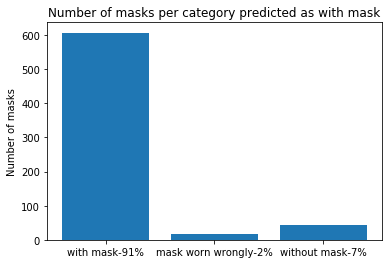

In [19]:
# segregate images with actual labels = 1 when prediction = 1 
img_with_mask1 = cf[1][1]
# segregate images with actual labels = 0 when prediction = 1 
img_worn_wrongly1 = cf[0][1]
# segregate images with actual labels = 2 when prediction = 1 
img_without_mask1 = cf[2][1]

# Find % of images predicted to be 1
t1 = img_with_mask1 + img_worn_wrongly1 + img_without_mask1
p1 = int(img_with_mask1/t1*100)
p0 = int(img_worn_wrongly1/t1*100)
p2 = 100-p1-p0


plt.bar(["with mask-"+str(p1)+"%","mask worn wrongly-"+str(p0)+"%","without mask-"+str(p2)+"%"],[img_with_mask1,img_worn_wrongly1,img_without_mask1])
plt.title("Number of masks per category predicted as with mask")
plt.ylabel("Number of masks")
plt.show()

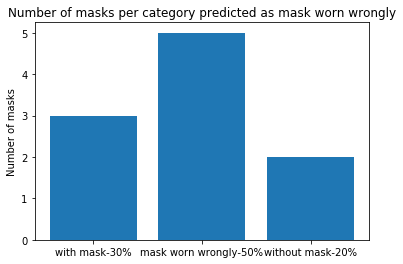

In [20]:
# segregate images with actual labels = 1 when prediction = 0 
img_with_mask0 = cf[1][0]
# segregate images with actual labels = 0 when prediction = 0 
img_worn_wrongly0 = cf[0][0]
# segregate images with actual labels = 2 when prediction = 0 
img_without_mask0 = cf[2][0]

# Find % of images predicted to be 0
t0 = img_with_mask0 + img_worn_wrongly0 + img_without_mask0
p1 = int(img_with_mask0/t0*100)
p0 = int(img_worn_wrongly0/t0*100)
p2 = 100-p1-p0


plt.bar(["with mask-"+str(p1)+"%","mask worn wrongly-"+str(p0)+"%","without mask-"+str(p2)+"%"],[img_with_mask0,img_worn_wrongly0,img_without_mask0])
plt.title("Number of masks per category predicted as mask worn wrongly")
plt.ylabel("Number of masks")
plt.show()

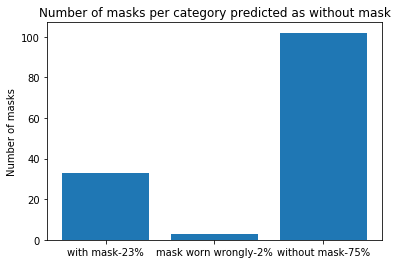

In [21]:

# segregate images with actual labels = 1 when prediction = 2
img_with_mask2 = cf[1][2]
# segregate images with actual labels = 0 when prediction = 2 
img_worn_wrongly2 = cf[0][2]
# segregate images with actual labels = 2 when prediction = 2 
img_without_mask2 = cf[2][2]

# Find % of images predicted to be 2
t2 = img_with_mask2 + img_worn_wrongly2 + img_without_mask2
p1 = int(img_with_mask2/t2*100)
p0 = int(img_worn_wrongly2/t2*100)
p2 = 100-p1-p0


plt.bar(["with mask-"+str(p1)+"%","mask worn wrongly-"+str(p0)+"%","without mask-"+str(p2)+"%"],[img_with_mask2,img_worn_wrongly2,img_without_mask2])
plt.title("Number of masks per category predicted as without mask")
plt.ylabel("Number of masks")
plt.show()

### Visualization - True Positives v.s. False Negatives

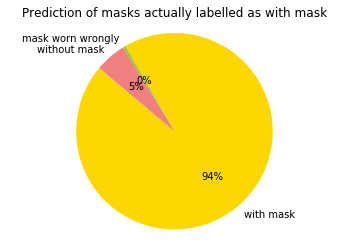

In [22]:
# Prediction of images with actuals labels = 1 (with mask)

# Data to plot
pred_labels = ['with mask', 'mask worn wrongly', 'without mask']
sizes = [img_with_mask1, img_with_mask0, img_with_mask2]
colors = ['gold', 'yellowgreen', 'lightcoral']

# Plot
plt.pie(sizes, labels=pred_labels, colors=colors, autopct='%1.0f%%', shadow=False, startangle=140)
plt.title("Prediction of masks actually labelled as with mask")

plt.axis('equal')
plt.show()

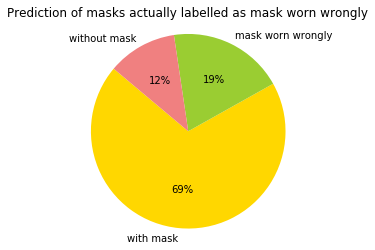

In [23]:
# Prediction of images with actuals labels = 0 (mask worn wrongly)

# Data to plot
pred_labels = ['with mask', 'mask worn wrongly', 'without mask']
sizes = [img_worn_wrongly1, img_worn_wrongly0, img_worn_wrongly2]
colors = ['gold', 'yellowgreen', 'lightcoral']

# Plot
plt.pie(sizes, labels=pred_labels, colors=colors, autopct='%1.0f%%', shadow=False, startangle=140)
plt.title("Prediction of masks actually labelled as mask worn wrongly")

plt.axis('equal')
plt.show()

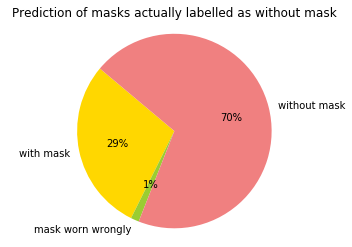

In [24]:
# Prediction of images with actuals labels = 2 (mask worn wrongly)

# Data to plot
pred_labels = ['with mask', 'mask worn wrongly', 'without mask']
sizes = [img_without_mask1, img_without_mask0, img_without_mask2]
colors = ['gold', 'yellowgreen', 'lightcoral']

# Plot
plt.pie(sizes, labels=pred_labels, colors=colors, autopct='%1.0f%%', shadow=False, startangle=140)
plt.title("Prediction of masks actually labelled as without mask")

plt.axis('equal')
plt.show()

# 7. Save models

In [26]:
import pickle as pk
pk.dump(pca_model, open(r"C:\Users\vigne\OneDrive\Desktop\adv_ds_project\pca_model.pkl","wb"))
pk.dump(best_model, open(r"C:\Users\vigne\OneDrive\Desktop\adv_ds_project\svm_pca_model.pkl","wb"))
# later reload the pickle file
# pca_reload = pk.load(open("pca.pkl",'rb'))
# result_new = pca_reload .transform(X)